# Validação do modelo de Churn
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss, precision_recall_curve, auc

## Leitura dos dados

In [2]:
df = pd.read_csv('resultadoChurn.csv')
df

,id,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
0,2378,0.363300,0.447457,0.351348,0.346369,não churn
1,576,0.447830,0.419347,0.331906,0.452514,não churn
2,704,0.319136,0.387097,0.320250,0.307263,não churn
3,3818,0.386128,0.419354,0.331906,0.365922,não churn
4,1972,0.427771,0.387099,0.320250,0.430168,não churn
...,...,...,...,...,...,...
4495,124,0.176044,0.004032,0.000580,0.245614,não churn
4496,3958,0.384150,0.193548,0.117813,0.403509,não churn
4497,777,0.188748,0.001099,0.000082,0.263158,não churn
4498,3276,0.226190,0.129032,0.086129,0.267857,não churn


## Ajustando os dados

In [3]:
df["resultado"] = df['resultado'].apply(lambda x: 1.0 if x == "churn" else 0.0)
df

,id,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
0,2378,0.363300,0.447457,0.351348,0.346369,0.0
1,576,0.447830,0.419347,0.331906,0.452514,0.0
2,704,0.319136,0.387097,0.320250,0.307263,0.0
3,3818,0.386128,0.419354,0.331906,0.365922,0.0
4,1972,0.427771,0.387099,0.320250,0.430168,0.0
...,...,...,...,...,...,...
4495,124,0.176044,0.004032,0.000580,0.245614,0.0
4496,3958,0.384150,0.193548,0.117813,0.403509,0.0
4497,777,0.188748,0.001099,0.000082,0.263158,0.0
4498,3276,0.226190,0.129032,0.086129,0.267857,0.0


## Validando o modelo

### Modelo Linear:

In [4]:
y_true, y_prob = df["resultado"], df["churnLinear"]

#### Log Loss

In [5]:
logloss = log_loss(y_true, y_prob)
print('Log Loss:', logloss)

Log Loss: 0.47050688086388054


#### ROC AUC

In [6]:
roc_auc = roc_auc_score(y_true, y_prob)
print('ROC AUC:', roc_auc)

ROC AUC: 0.9531353024808373


#### Brier Score

In [7]:
brier = brier_score_loss(y_true, y_prob)
print('Brier Score:', brier)

Brier Score: 0.14378594713318385


#### Precision-Recall AUC

In [8]:
precision, recall, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(recall, precision)
print('Precision-Recall AUC:', pr_auc)

Precision-Recall AUC: 0.6000253891432998


##### Calibration Curve

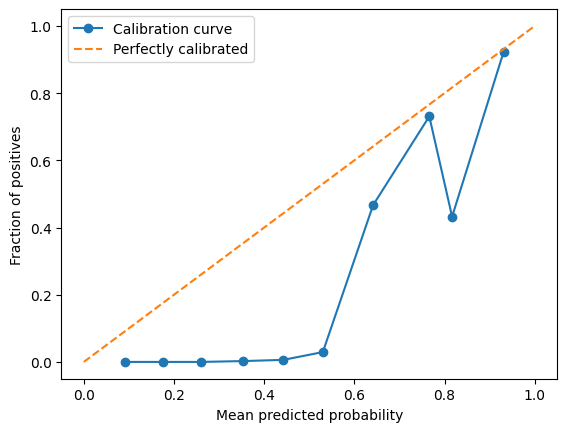

In [9]:
prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.show()

### Modelo Exponencial de base 2:

In [10]:
y_true, y_prob = df["resultado"], df["churnExponencial_2"]

#### Log Loss

In [11]:
logloss = log_loss(y_true, y_prob)
print('Log Loss:', logloss)

Log Loss: 0.3710050129133647


#### ROC AUC

In [12]:
roc_auc = roc_auc_score(y_true, y_prob)
print('ROC AUC:', roc_auc)

ROC AUC: 0.9370917641968186


#### Brier Score

In [13]:
brier = brier_score_loss(y_true, y_prob)
print('Brier Score:', brier)

Brier Score: 0.10429233088228032


#### Precision-Recall AUC

In [14]:
precision, recall, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(recall, precision)
print('Precision-Recall AUC:', pr_auc)

Precision-Recall AUC: 0.6430182663851409


##### Calibration Curve

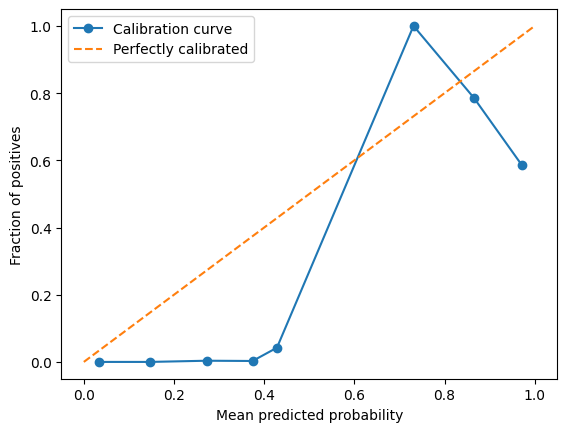

In [15]:
prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.show()

### Modelo Exponencial de base e:

In [16]:
y_true, y_prob = df["resultado"], df["churnExponencial_e"]

#### Log Loss

In [17]:
logloss = log_loss(y_true, y_prob)
print('Log Loss:', logloss)

Log Loss: 0.2989097253148035


#### ROC AUC

In [18]:
roc_auc = roc_auc_score(y_true, y_prob)
print('ROC AUC:', roc_auc)

ROC AUC: 0.9370814617159811


#### Brier Score

In [19]:
brier = brier_score_loss(y_true, y_prob)
print('Brier Score:', brier)

Brier Score: 0.07350562876689051


#### Precision-Recall AUC

In [20]:
precision, recall, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(recall, precision)
print('Precision-Recall AUC:', pr_auc)

Precision-Recall AUC: 0.6434294836248994


##### Calibration Curve

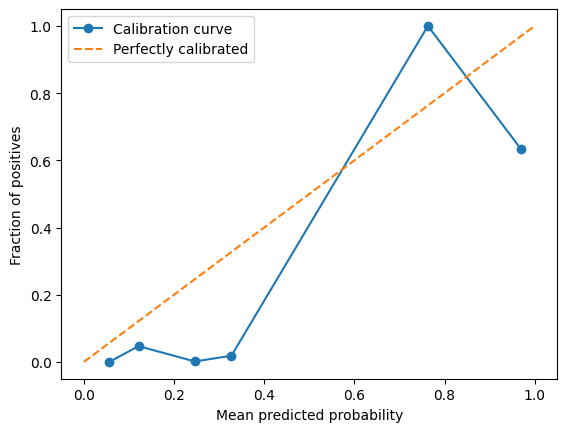

In [21]:
prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.show()

### Modelo Recente:

In [22]:
y_true, y_prob = df["resultado"], df["churnRecente"]

#### Log Loss

In [23]:
logloss = log_loss(y_true, y_prob)
print('Log Loss:', logloss)

Log Loss: 0.5005863703366148


#### ROC AUC

In [24]:
roc_auc = roc_auc_score(y_true, y_prob)
print('ROC AUC:', roc_auc)

ROC AUC: 0.9356944902332481


#### Brier Score

In [25]:
brier = brier_score_loss(y_true, y_prob)
print('Brier Score:', brier)

Brier Score: 0.1572775771628786


#### Precision-Recall AUC

In [26]:
precision, recall, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(recall, precision)
print('Precision-Recall AUC:', pr_auc)

Precision-Recall AUC: 0.5734754207223625


##### Calibration Curve

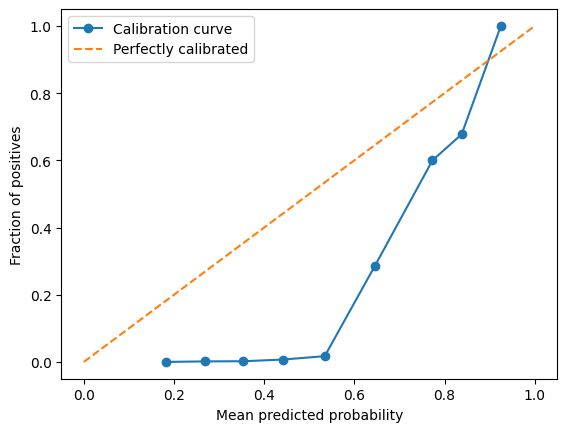

In [27]:
prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.show()